Baseball Case Study

Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

import warnings

In [111]:
df=pd.read_csv("Evaluation Project - 1_baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [112]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [113]:
df.shape

(30, 17)

In [114]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [116]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [117]:
df.nunique(axis=0)

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [118]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


df.describe(): gives the statistical description where:


        1)There is no null value.
        2)Mean(W) is less than 50% of total, mean the data is left skewed.
        3)The target value of column is around 80.96 and the maximum is 100, mean the match winning is large.
        4)The 'SB' column is normally distributed, where there is no outlier lie.
        5)The statistical data show the presence of outliers.

<AxesSubplot:>

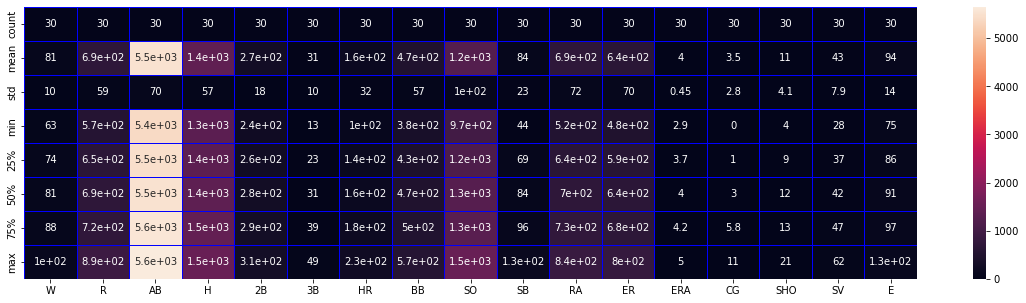

In [119]:
plt.figure(figsize=(20,5))
sns.heatmap(df.describe(), linewidth=1,linecolor='blue',annot=True)

In [120]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

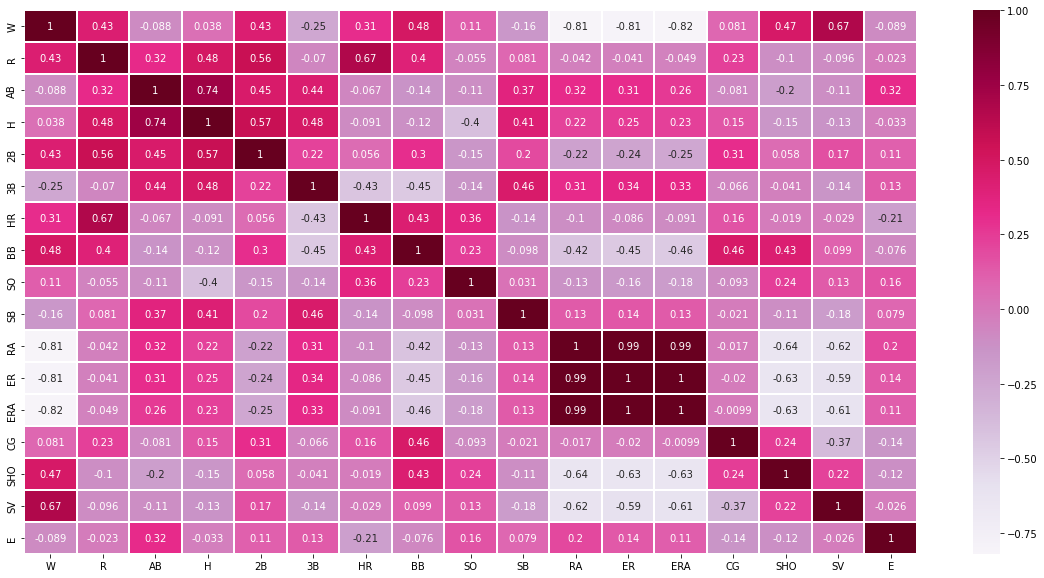

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), linewidth=0.1,fmt='.2g',cmap='PuRd',annot=True)

By visiualization, we can find the correlation between the 'H','CG' with respect to the 'W' is very less, so here we can drop these columns.

In [122]:
df.drop(['H','CG'],axis=1, inplace=True)

In [123]:
df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [124]:
df.shape

(30, 15)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

<function matplotlib.pyplot.show(close=None, block=None)>

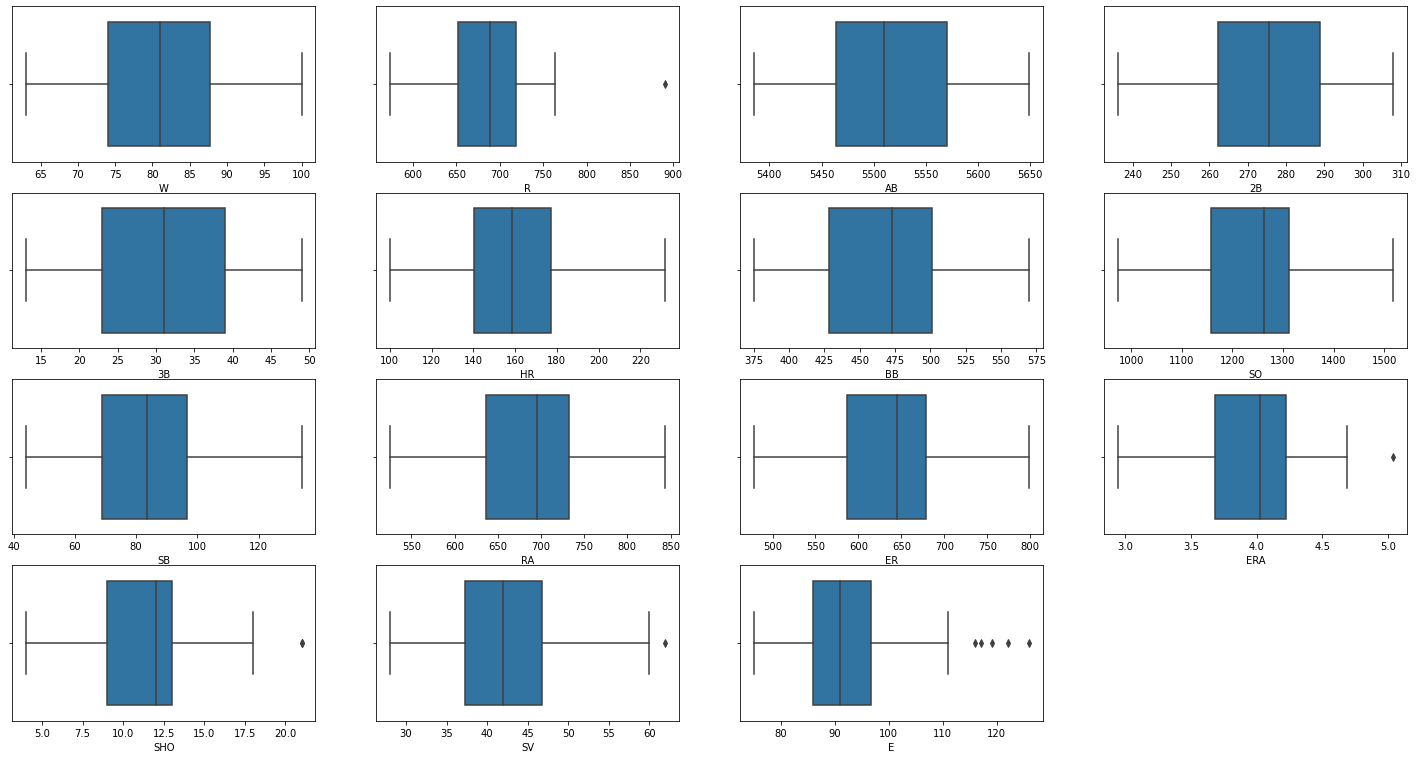

In [125]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show

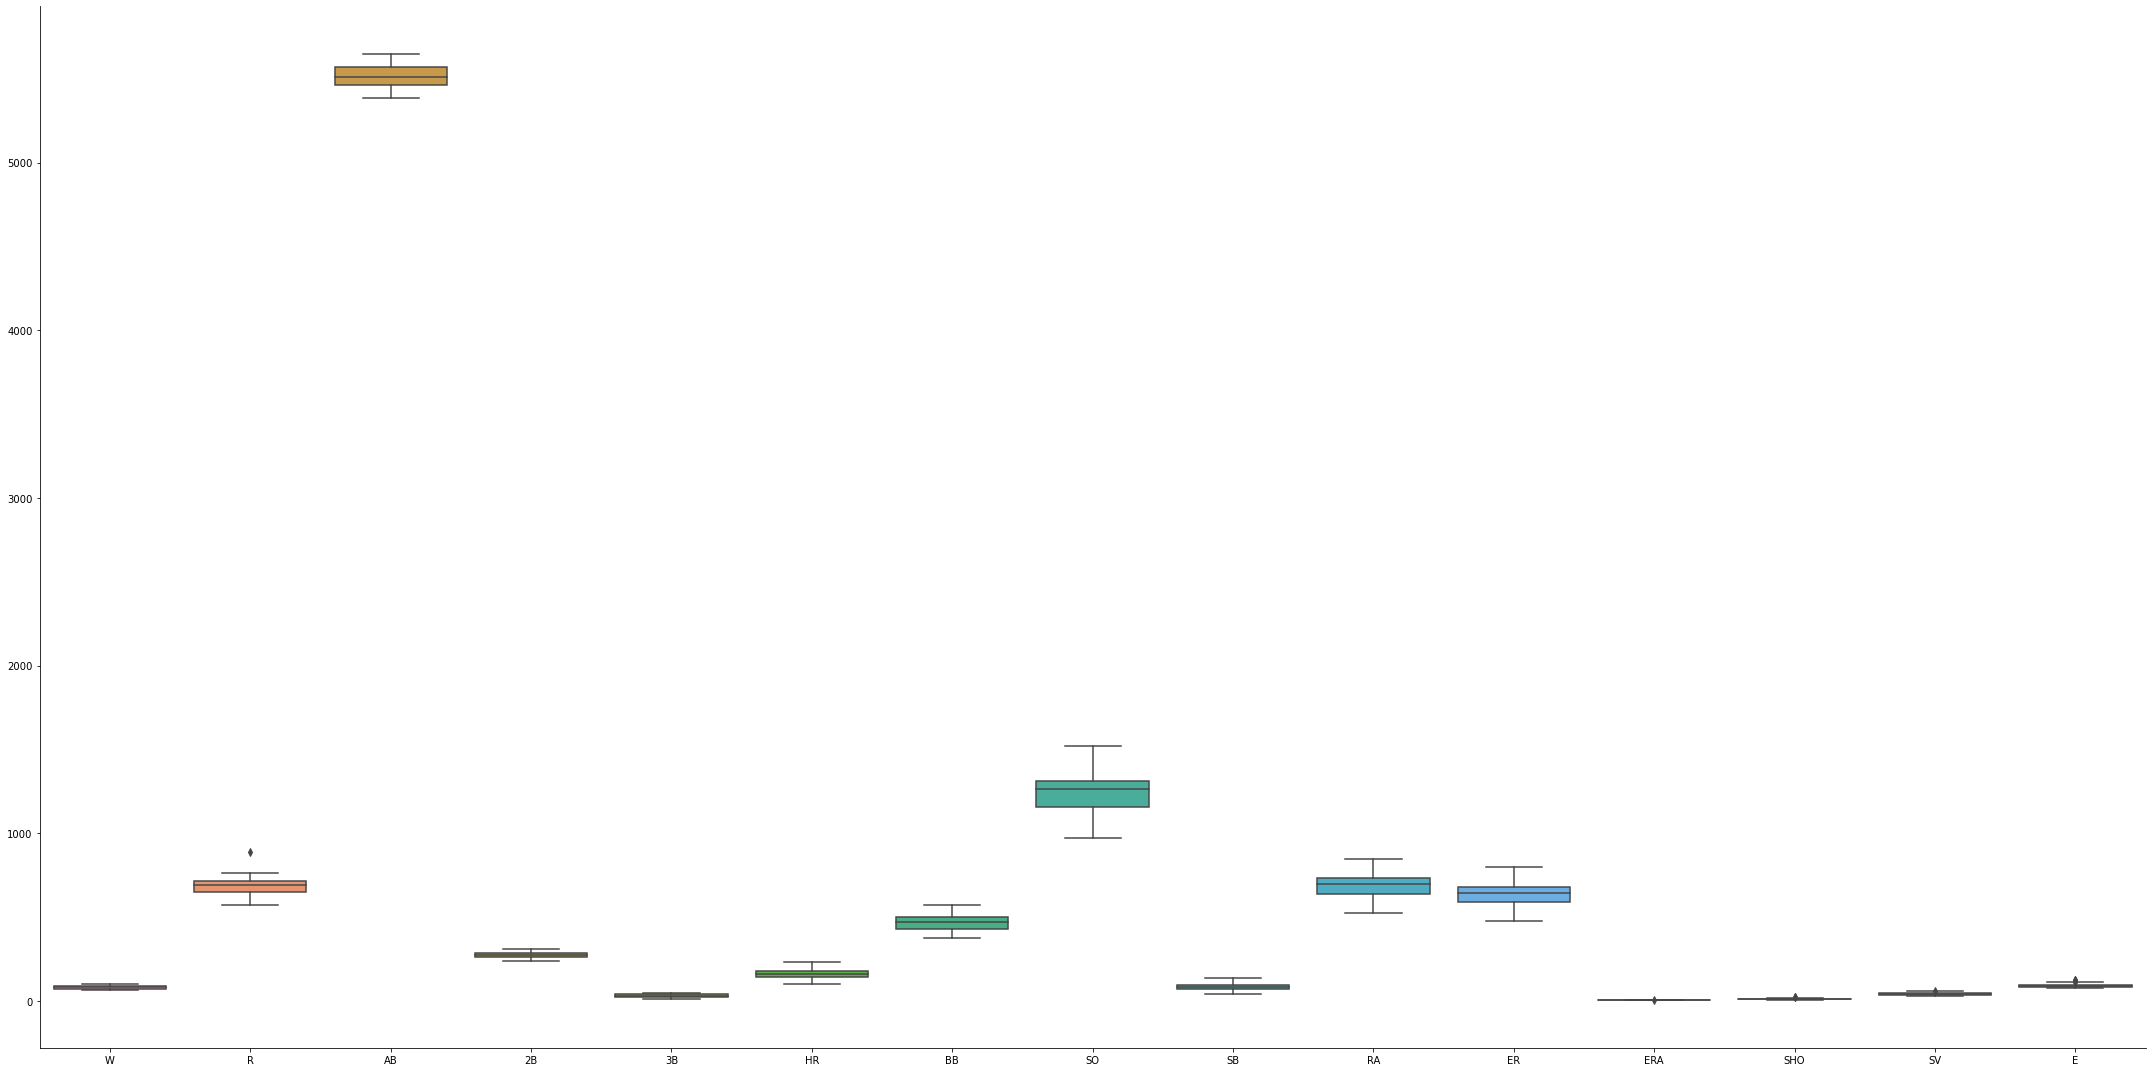

In [126]:
sns.catplot(data=df,kind='box',margin_titles=True,aspect=2,height=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x253d0dfdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x253d0e0c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d0dfdac0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d0e0c7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d0e0cac0>],
 'means': []}

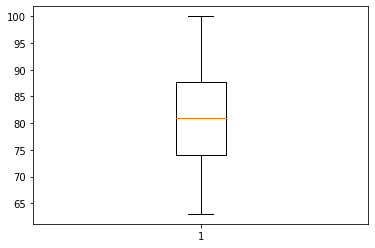

In [127]:
plt.boxplot(df['W'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d17368b0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1736e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d17366d0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1744430>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1744700>],
 'means': []}

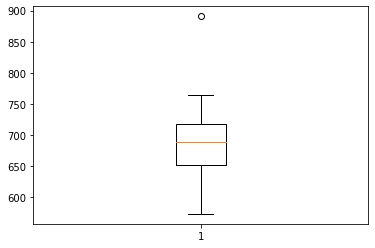

In [128]:
plt.boxplot(df['R'])

Outlier present in the "R" column

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1794ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d17a44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d1794c10>],
 'medians': [<matplotlib.lines.Line2D at 0x253d17a4a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d17a4d30>],
 'means': []}

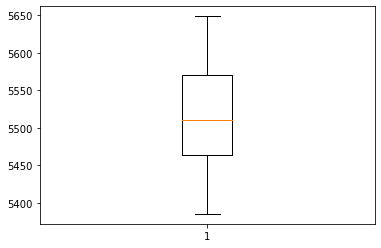

In [129]:
plt.boxplot(df['AB'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d17f5fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1806580>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d17f5cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1806b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1806df0>],
 'means': []}

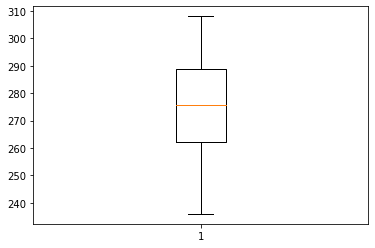

In [130]:
plt.boxplot(df['2B'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1861bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1871190>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d18618e0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1871730>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1871a00>],
 'means': []}

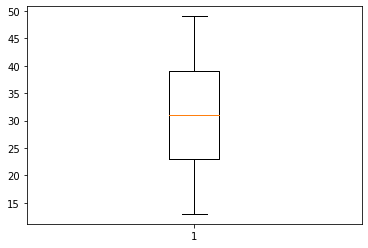

In [131]:
plt.boxplot(df['3B'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d18cf790>,
 'caps': [<matplotlib.lines.Line2D at 0x253d18cfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d18cf4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d18dc310>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d18dc5e0>],
 'means': []}

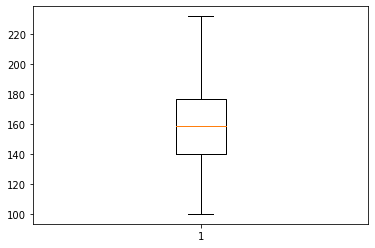

In [132]:
plt.boxplot(df['HR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253ce45b130>,
 'caps': [<matplotlib.lines.Line2D at 0x253ce464670>,
 'boxes': [<matplotlib.lines.Line2D at 0x253ce45b220>],
 'medians': [<matplotlib.lines.Line2D at 0x253ce464850>],
 'fliers': [<matplotlib.lines.Line2D at 0x253ce464f40>],
 'means': []}

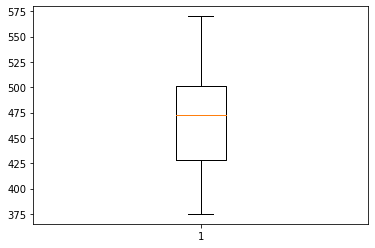

In [133]:
plt.boxplot(df['BB'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253ce075e50>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1916430>,
 'boxes': [<matplotlib.lines.Line2D at 0x253ce075b80>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1916a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1916cd0>],
 'means': []}

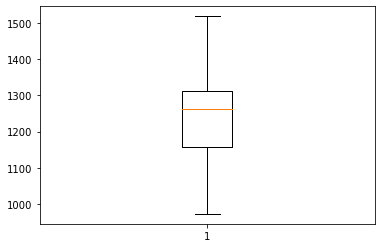

In [134]:
plt.boxplot(df['SO'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d196d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d196d850>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d195ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d196ddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d197b100>],
 'means': []}

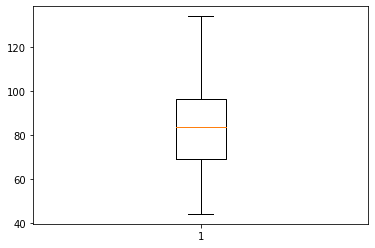

In [135]:
plt.boxplot(df['SB'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d19c2f40>,
 'caps': [<matplotlib.lines.Line2D at 0x253d19d0520>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d19c2c70>],
 'medians': [<matplotlib.lines.Line2D at 0x253d19d0ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d19d0d90>],
 'means': []}

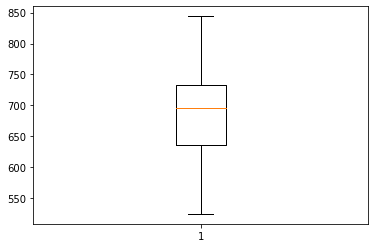

In [136]:
plt.boxplot(df['RA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1a2e880>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1a2ee20>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d1a2e5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1a3d400>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1a3d6d0>],
 'means': []}

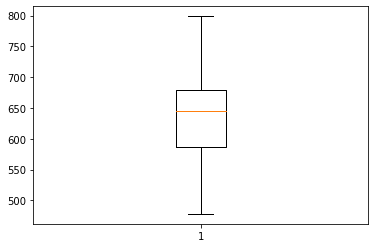

In [137]:
plt.boxplot(df['ER'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1a9c1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1a9c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d1a8cee0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1a9cd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1aa8040>],
 'means': []}

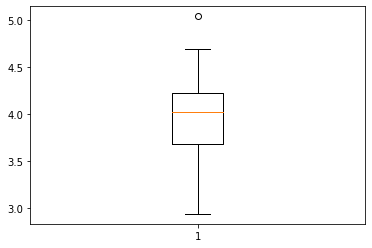

In [138]:
plt.boxplot(df['ERA'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1af5730>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1af5cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d1af5460>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1b042b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1b04580>],
 'means': []}

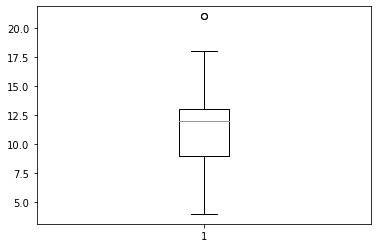

In [139]:
plt.boxplot(df['SHO'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d1b58d00>,
 'caps': [<matplotlib.lines.Line2D at 0x253d1b672e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d1b58a30>],
 'medians': [<matplotlib.lines.Line2D at 0x253d1b67880>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d1b67b50>],
 'means': []}

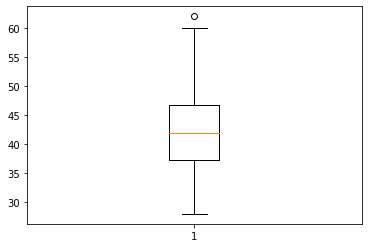

In [140]:
plt.boxplot(df['SV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d2b97580>,
 'caps': [<matplotlib.lines.Line2D at 0x253d2b97b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d2b972b0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d2ba3100>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d2ba33d0>],
 'means': []}

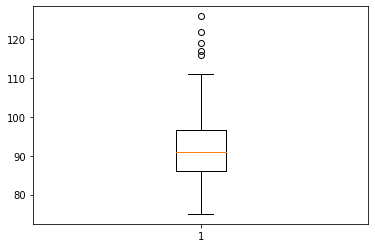

In [141]:
plt.boxplot(df['E'])

The outlier present in the 'R','SHO','SV','E', and 'ERA' column. Now remove the outlier.

In [142]:
feature=df[['R','SHO','SV','E','ERA']]

In [143]:
from scipy.stats import zscore
z=np.abs(zscore(feature))
z

,R,SHO,SV,E,ERA
0,0.619078,0.814629,1.671607,0.461470,0.506955
1,0.134432,0.172800,0.249879,0.607197,0.254598
2,0.332906,0.320914,0.654856,1.117242,0.641347
3,1.146419,0.567771,0.784104,0.485758,0.053010
4,0.013270,0.172800,1.042600,0.607197,1.531318
5,3.509647,0.320914,1.171848,0.461470,0.350165
6,1.311430,1.802057,0.637623,0.097152,0.165003
7,0.428681,0.320914,0.008617,1.262970,0.209800
8,0.765626,0.172800,2.188598,0.048576,0.484557
9,1.034489,0.320914,0.396360,0.194303,0.792164


In [144]:
dff=df[(z<3).all(axis=1)]
dff

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [145]:
print(df.shape)
print(dff.shape)

(30, 15)
(29, 15)


In [146]:
data_loss_percent = ((30-29)/30*100)
data_loss_percent

3.3333333333333335

In [147]:

# 1st quantile
Q1 = feature.quantile(0.25)

# 3rd Quantile
Q3 = feature.quantile(0.75)

#IQR
IQR = Q3-Q1
IQR
df1 = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\HP\AppData\Local\Temp/ipykernel_9204/939565933.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]


In [148]:
df1.shape

(20, 15)

In [149]:
data_loss_percentage=(30-20)/30*100
data_loss_percentage

33.33333333333333

By comparing IQR(33.33%) and Zscore(3.33%), IQR loss more data as compare to the Zcore.

{'whiskers': [<matplotlib.lines.Line2D at 0x253d2befe80>,
 'caps': [<matplotlib.lines.Line2D at 0x253d2bfe460>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d2befb80>],
 'medians': [<matplotlib.lines.Line2D at 0x253d2bfea00>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d2bfecd0>],
 'means': []}

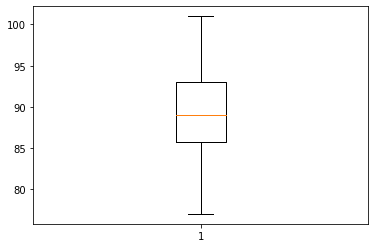

In [150]:
plt.boxplot(df1['E'])

{'whiskers': [<matplotlib.lines.Line2D at 0x253d2c54820>,
 'caps': [<matplotlib.lines.Line2D at 0x253d2c54dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d2c54520>],
 'medians': [<matplotlib.lines.Line2D at 0x253d2c633a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d2c63670>],
 'means': []}

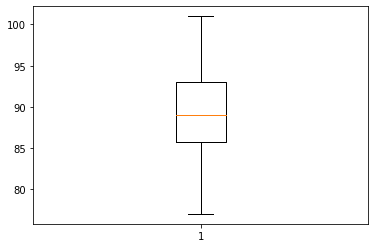

In [151]:
plt.boxplot(df1['E'])

After visiualization, we go thorough the Inter Quantile Range Method.

Now, check the skewness may be present in the Dataframe.

In [152]:
df1.skew()

W     -0.194773
R     -0.316726
AB     0.345887
2B    -0.149289
3B     0.268007
HR     0.360341
BB     0.079234
SO    -0.791526
SB     0.639024
RA     0.304559
ER     0.213161
ERA    0.218418
SHO   -0.135227
SV     1.043927
E     -0.243990
dtype: float64

In [153]:
a=['SO','SB']

from sklearn.preprocessing import PowerTransformer
transform = PowerTransformer(method='yeo-johnson')

Here we use "YEO-JOHNSON" method to remove skewness because "BOX-COX" strictly support positivily dataframe only but "YEO-JOHNSON" support both positive as well as negative dataframe.

In [154]:
df1[a]=transform.fit_transform(df1[a].values)
df1[a].head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,SO,SB
0,-2.065604,0.911287
1,0.163141,-0.354606
2,-0.897936,0.311689
3,-0.200053,-0.449841
4,0.105902,0.198013


In [155]:
df1.skew()

W     -0.194773
R     -0.316726
AB     0.345887
2B    -0.149289
3B     0.268007
HR     0.360341
BB     0.079234
SO    -0.112317
SB     0.012717
RA     0.304559
ER     0.213161
ERA    0.218418
SHO   -0.135227
SV     1.043927
E     -0.243990
dtype: float64

Now we remove the skewness 

In [156]:
x=dff.drop('W',axis=1)
y=dff['W']

In [157]:
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [158]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [159]:
x.shape

(29, 14)

In [160]:
y.shape

(29,)

In [161]:
from sklearn.preprocessing import StandardScaler
x=pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)
x


,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.570122,0.211006,1.757915


Well the data is scaled with the help of StandardScaler.

In [162]:
# Find the best Random state
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [163]:
from sklearn.linear_model import LinearRegression
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.8913695890283732 at random state  104


In [164]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

In [165]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [166]:
lr=LinearRegression()
lr.fit(x_train,y_train)
Predlr=lr.predict(x_test)
print('R2_Score:',r2_score(y_test,Predlr))
print('Mean_Absolute_Error:',metrics.mean_absolute_error(y_test,Predlr))
print('Mean_Squared_Error:',metrics.mean_squared_error(y_test,Predlr))
print('Root_Mean_Squared_Error:',np.sqrt(metrics.mean_squared_error(y_test,Predlr)))

R2_Score: 0.8913695890283732
Mean_Absolute_Error: 3.1469772863797894
Mean_Squared_Error: 14.363354339581772
Root_Mean_Squared_Error: 3.7899016266364716


In [167]:
paramsRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'saga'}


In [168]:
ridge = Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
predridge = ridge.predict(x_test)

print("R2_score:",r2_score(y_test,predridge))

print("MAE:",metrics.mean_absolute_error(y_test,predridge))

print("MSE:",metrics.mean_squared_error(y_test,predridge))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predridge)))

R2_score: 0.7470015050818843
MAE: 4.659757597133687
MSE: 33.452023216950835
RMSE: 5.783772403626446


In [169]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.313e+01, tolerance: 1.445e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.875e+00, tolerance: 1.470e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.915e+00, tolerance: 1.432e

{'alpha': 1, 'random_state': 0}


In [170]:
lasso = Lasso(alpha=0.001,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso = lasso.predict(x_test)

print("R2_score:",r2_score(y_test,pred_lasso))

print("MAE:",metrics.mean_absolute_error(y_test,pred_lasso))

print("MSE:",metrics.mean_squared_error(y_test,pred_lasso))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))

R2_score: 0.8068983955553408
MAE: 4.421487955285071
MSE: 25.53232325434938
RMSE: 5.052951934696131


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.252e+01, tolerance: 1.825e-01
  model = cd_fast.enet_coordinate_descent(


In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.11723455946697894


In [173]:
print(cross_val_score(ridge,x,y,cv=5).mean())

0.29689660626915143


In [174]:
print(cross_val_score(lasso,x,y,cv=5).mean())

0.0576165267567136


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.973e+01, tolerance: 2.692e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.264e+01, tolerance: 2.898e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.156e+01, tolerance: 1.706e

Cross validation score is help to assessing the effictiveness of the prepared model.
Highest cross validation score is 0.2973 of the Ridge Model

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
#Ridge parameters
parameters = {'alpha':[0,1,2,3,4,5,6,0.1,0.01,0.3,0.2],
             'fit_intercept':['True'],
             'normalize':[True],
             'solver':['sag']}


In [177]:
gcv=GridSearchCV(ridge,parameters,cv=5)

In [178]:
gcv.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pip

GridSearchCV(cv=5, estimator=Ridge(alpha=10.26, solver='sag'),
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 0.1, 0.01, 0.3, 0.2],
                         'fit_intercept': ['True'], 'normalize': [True],
                         'solver': ['sag']})

In [179]:
gcv.best_params_

{'alpha': 1, 'fit_intercept': 'True', 'normalize': True, 'solver': 'sag'}

In [180]:
#Final Model
ridge = Ridge(alpha=1,solver='sag',fit_intercept=True,normalize=True)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
predridge = ridge.predict(x_test)


print("R2_score:",r2_score(y_test,predridge))

print("MAE:",metrics.mean_absolute_error(y_test,predridge))

print("MSE:",metrics.mean_squared_error(y_test,predridge))

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predridge)))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


R2_score: 0.688640124922953
MAE: 5.374349336929721
MSE: 41.16869459352066
RMSE: 6.4162835499626


After tuning the model,the R2.Score is 68.85% for the best model.

In [181]:
import joblib
joblib.dump(ridge,'Evaluation project -1.Baseball.pkl')

['Evaluation project -1.Baseball.pkl']

In [182]:
loadmodel=joblib.load('Evaluation project -1.Baseball.pkl')

In [183]:
a=np.array(y_test)
predict=np.array(loadmodel.predict(x_test))
df=pd.DataFrame({'Original:':a,'Predicted:':predict},index=range(len(a)))
df

,Original:,Predicted:
0,92,90.995169
1,64,73.728662
2,67,73.987868
3,90,88.961059
4,76,78.979773
5,88,78.819025
6,71,76.344711
7,98,88.077212
8,74,76.180593


<function matplotlib.pyplot.show(close=None, block=None)>

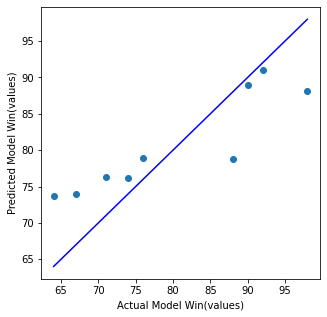

In [184]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predict)
plt1=max(max(predict),max(y_test))
plt2=min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel("Actual Model Win(values)")
plt.ylabel("Predicted Model Win(values)")
plt.show

Here, In this model line is Actual Model win and dots are the Predicted Win.